In [1]:
import numpy
import random
import math
import collections
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

In [2]:
n = 100;
x_i = [];
d = [];
class_0 = [];
class_1 = [];

In [3]:
#Generating 100 random points where each point: x = [x1 x2] is chosen independently and uniformly at random on [0,1]
#The corresponding output for each is generated using the following rules
# di = {
#        1;  xi2 < (1/5)sin(10*xi1) + 0.3 or (xi2 - 0:8)^2 + (xi1 - 0.5)^2 < 0.15^2
#       -1;  otherwise
#      }
#Class 0: set of x_i when d_i = 1; Class 1: set of x_i when d_i = -1
for i in range(0,n):
    temp = numpy.transpose(numpy.random.uniform(0,1,2));
    x_i.append(temp);
    
    x_1 = temp[0];
    x_2 = temp[1];
    
    if (x_2 < ((1/5) * numpy.sin(10*x_1) + 0.3)) or ((math.pow((x_2 - 0.8),2) + math.pow((x_1 - 0.5),2))) < math.pow(0.15,2):
        d.append(1);
        class_1.append(temp);
    else:
        d.append(-1);
        class_0.append(temp);

x_i = numpy.array(x_i);

In [4]:
x_class_1 = [];
y_class_1 = [];

x_class_0 = [];
y_class_0 = [];
for element in class_1:
    x_class_1.append(element[0]);
    y_class_1.append(element[1]);
    
for element in class_0:
    x_class_0.append(element[0]) ;
    y_class_0.append(element[1]);

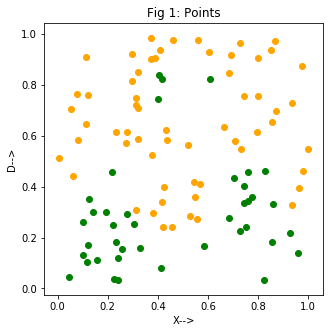

In [5]:
#Green: Class 0; Orange: Class 1
fig, ax = plt.subplots(figsize=(5,5));
plt.scatter(x_class_0,y_class_0, c = 'orange');
plt.scatter(x_class_1,y_class_1, c = 'green');
plt.title('Fig 1: Points');
plt.ylabel('D-->');
plt.xlabel('X-->');
plt.show();

In [6]:
#Kernel Function:
def polynomial_kernel(x, y, p=8):
    return (1 + numpy.dot(x, y)) ** p

In [7]:
tempMatrix = [];
for i in range(0,len(x_i)):
    tempMatrix.append([]);
    for j in range(0,len(x_i)):
        tempMatrix[i].append(polynomial_kernel(x_i[i],x_i[j]));# * (-1/2));

In [8]:
P = [];
for i in range(0,100):
    P.append([]);
    for j in range(0,100):
        if i != j:
            P[i].append(((tempMatrix[i][j] +  tempMatrix[j][i]) * d[i] * d[j])/2);
        else:
            P[i].append(tempMatrix[i][j] * d[i] * d[i]);
P = numpy.array(P);

In [9]:
G = []
for i in range(0,100):
    G.append([]);
    for j in range(0,100):
        if i != j:
            G[i].append(0.0);
        else:
            G[i].append(-1);

G = numpy.array(G);

A = []
for i in range(0,100):
    A.append(d[i] * 1.0);
A = numpy.array(A);
A.resize(1,100);

In [10]:
q = matrix(numpy.ones(100) * -1)
h = numpy.zeros(100);
h.resize(100,1);

In [11]:
#All the matrixes required for CVX Optimisation Quadratic Programing are calculated above.
P = (1/2) * matrix(P);
q = matrix(q);
G = matrix(G);
h = matrix(h);
A = matrix(A);
b = matrix(0.0);

In [12]:
sol = solvers.qp(P,q,G,h,A,b);

     pcost       dcost       gap    pres   dres
 0: -4.7781e+01 -1.3997e+02  4e+02  1e+01  3e+00
 1: -1.6776e+02 -3.0164e+02  2e+02  8e+00  1e+00
 2: -2.9755e+02 -4.5737e+02  3e+02  7e+00  1e+00
 3: -6.1033e+02 -8.2894e+02  3e+02  6e+00  1e+00
 4: -1.6499e+03 -1.9780e+03  4e+02  5e+00  1e+00
 5: -2.0652e+03 -2.4178e+03  5e+02  5e+00  1e+00
 6: -3.6647e+03 -4.3120e+03  8e+02  5e+00  9e-01
 7: -5.6481e+03 -6.8742e+03  1e+03  4e+00  8e-01
 8: -8.0820e+03 -9.8690e+03  2e+03  3e+00  5e-01
 9: -9.2224e+03 -1.0035e+04  9e+02  7e-01  1e-01
10: -9.2747e+03 -9.2912e+03  2e+01  1e-02  2e-03
11: -9.2751e+03 -9.2753e+03  2e-01  1e-04  2e-05
12: -9.2751e+03 -9.2751e+03  2e-03  1e-06  2e-07
13: -9.2751e+03 -9.2751e+03  2e-05  1e-08  2e-09
Optimal solution found.


In [13]:
#Quadratuc Programming returns set of possible alphas:
aplhas_matrix = sol['x'];
alpha_list = numpy.ravel(aplhas_matrix);

In [14]:
#Set a threshold value (50 here), so that the all the alphas above this threshold will be considered as Support Vectors.
support_vectors_x = [];
support_vectors_y = [];
sv_indices = [];
for i in range(0,len(alpha_list)):
    if (alpha_list[i] > 50):
        temp = x_i[i];
        sv_indices.append(i);
        support_vectors_x.append(temp[0]);
        support_vectors_y.append(temp[1]);
        
print (sv_indices);
print(random.choice(sv_indices));

[15, 21, 25, 28, 44, 50, 59, 77, 84, 99]
25


In [15]:
print (len(support_vectors_x));

10


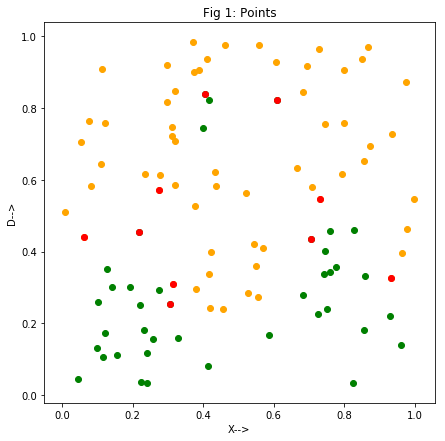

In [16]:
#Red points: SupportVectors; Green: Class 0; Orange: Class 1
fig, ax = plt.subplots(figsize=(7,7));
plt.scatter(x_class_0,y_class_0, c = 'orange');
plt.scatter(x_class_1,y_class_1, c = 'green');
plt.scatter(support_vectors_x,support_vectors_y, c = 'red');
plt.title('Fig 1: Points');
plt.ylabel('D-->');
plt.xlabel('X-->');
plt.show();

In [17]:
#calculate theta:
sv = x_i[random.choice(sv_indices)]; #
sv_x = sv[0];
sv_y = sv[1];
theta = 0.0;
sum = 0.0;
for i in range(0,len(x_i)):
    temp = alpha_list[i] * d[i] *  polynomial_kernel(x_i[i],sv);
    sum = sum + temp;
print (sum);
theta = d[32] - sum;
print (theta);

-47.3733985799
46.3733985799


In [18]:
#Choose Random points:
random_n = 2000;
random_x1 = numpy.linspace(0,1,random_n);
random_y1 = numpy.linspace(0,1,random_n);

print (len(random_x1));
print (len(random_y1));

random_x = [];

for i in range(0,random_n):
    for j in range(0,random_n):
        random_x.append([random_x1[i],random_y1[j]]);
print (len(random_x));

2000
2000
4000000


In [19]:
#Calculate g(x) :- discriminant:
def calculateDiscriminant(randomX):
    sum_discriminant = 0.0;
    for i in range(0,len(x_i)):
        temp = alpha_list[i] * d[i] * polynomial_kernel(x_i[i],randomX);
        sum_discriminant = sum_discriminant + temp;
    
    sum_discriminant = sum_discriminant + theta;
    return sum_discriminant;

In [20]:
#Calculating HyperPlanes : H, H+ and H-
Hplus = [];
Hminus = [];
H = [];
for i in range(0,len(random_x)):
    temp = calculateDiscriminant(random_x[i]);
    if temp < 0.01 and temp > -0.01:
        H.append(random_x[i]);
    
    if temp < 1.01 and temp > 0.999:
        Hplus.append(random_x[i]);
    
    if temp < -0.999 and temp > -1.01:
        Hminus.append(random_x[i]);
    
        
print (len(H));
print (len(Hplus));
print (len(Hminus));

1828
897
1257


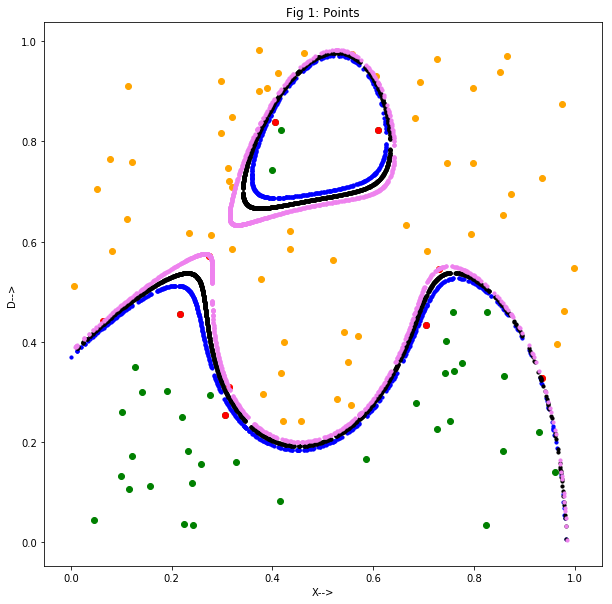

In [21]:
fig, ax = plt.subplots(figsize=(10,10));
plt.scatter(x_class_0,y_class_0, c = 'orange');
plt.scatter(x_class_1,y_class_1, c = 'green');
plt.scatter(support_vectors_x,support_vectors_y, c = 'red');
plt.scatter(*zip(*Hplus), c = 'blue',s = 10, label = 'Hyperplane 1')
plt.scatter(*zip(*H), c = 'black', s = 10,label = 'Margin')
plt.scatter(*zip(*Hminus), c = 'violet',s = 10, label = 'Hyperplane -1')
plt.title('Fig 1: Points');
plt.ylabel('D-->');
plt.xlabel('X-->');
plt.show();